In [13]:
import pandas as pd

# Baca file csv
data = pd.read_csv("/content/Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021.csv")

In [14]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   365 non-null    object 
 1   pm10      365 non-null    int64  
 2   pm25      334 non-null    float64
 3   so2       365 non-null    int64  
 4   co        365 non-null    int64  
 5   o3        365 non-null    int64  
 6   no2       365 non-null    int64  
 7   max       365 non-null    int64  
 8   critical  365 non-null    object 
 9   categori  365 non-null    object 
 10  location  365 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 31.5+ KB


,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3


In [15]:
# Menghapus kolom yang tidak relevan
data.drop(['tanggal', 'categori', 'location'], axis=1, inplace=True)


In [16]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      365 non-null    int64  
 1   pm25      334 non-null    float64
 2   so2       365 non-null    int64  
 3   co        365 non-null    int64  
 4   o3        365 non-null    int64  
 5   no2       365 non-null    int64  
 6   max       365 non-null    int64  
 7   critical  365 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 22.9+ KB


,pm10,pm25,so2,co,o3,no2,max,critical
0,43,NaN,58,29,35,65,65,O3
1,58,NaN,86,38,64,80,86,PM25
2,64,NaN,93,25,62,86,93,PM25
3,50,NaN,67,24,31,77,77,O3
4,59,NaN,89,24,35,77,89,PM25


In [17]:
# Mengisi nilai yang hilang dengan mean
data = data.fillna(data.mean())

<ipython-input-17-23cc95f9acf8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [18]:
data.head()

,pm10,pm25,so2,co,o3,no2,max,critical
0,43,94.694611,58,29,35,65,65,O3
1,58,94.694611,86,38,64,80,86,PM25
2,64,94.694611,93,25,62,86,93,PM25
3,50,94.694611,67,24,31,77,77,O3
4,59,94.694611,89,24,35,77,89,PM25


In [19]:
from sklearn.preprocessing import LabelEncoder

# Encoding kolom 'critical'
le = LabelEncoder()
data['critical'] = le.fit_transform(data['critical'])

In [20]:
# Normalisasi fitur numerik
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [21]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      365 non-null    float64
 1   pm25      365 non-null    float64
 2   so2       365 non-null    float64
 3   co        365 non-null    float64
 4   o3        365 non-null    float64
 5   no2       365 non-null    float64
 6   max       365 non-null    int64  
 7   critical  365 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 22.9 KB


,pm10,pm25,so2,co,o3,no2,max,critical
0,0.15000,0.43755,0.235955,0.550,0.114504,0.448,65,0
1,0.24375,0.43755,0.550562,0.775,0.335878,0.568,86,2
2,0.28125,0.43755,0.629213,0.450,0.320611,0.616,93,2
3,0.19375,0.43755,0.337079,0.425,0.083969,0.544,77,0
4,0.25000,0.43755,0.584270,0.425,0.114504,0.544,89,2


In [22]:
from sklearn.cluster import KMeans

# Membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

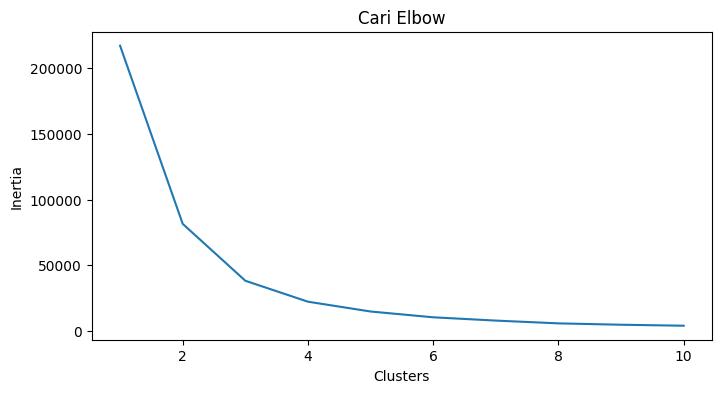

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [24]:
# Memilih jumlah klaster optimal
n_clusters = 4

In [25]:
# Membuat objek KMeans
km = KMeans(n_clusters=n_clusters).fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# Menambahkan kolom label pada dataset
data['Labels'] = km.labels_

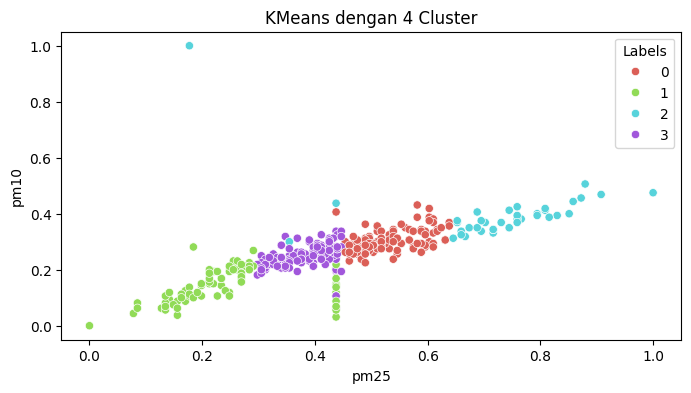

In [27]:
# Membuat plot KMeans dengan jumlah klaster yang dipilih
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['pm25'], y=data['pm10'], hue=data['Labels'], palette=sns.color_palette('hls', n_clusters))
plt.title(f'KMeans dengan {n_clusters} Cluster')
plt.show()